## Introduction: Give the details on the source of your data, its content, and some questions you are interested in. The data should have at least 1000 rows and 4 columns.

#### This dataset contains data regarding recorded cases of Coronavirus between January 2020 and June 2020 from Kaggle. 
#### It contains 4389 rows and 6 columns. A single row reflects the amount of confirmed cases, deaths, and the amount of people confirmed to have recovered from the virus in a single state/country on a single observed date.
#### Our group will present Coronavirus tracking the number of confirmed cases, Death toll and Recovered patients in USA. 


#### Source: https://www.kaggle.com/code/khoongweihao/covid-19-novel-coronavirus-eda-forecasting-cases/notebook


### Variables in this dataset:

*   ObservationDate - dates of reported cases
*   Province/State 
*   Country/Region
*   Confirmed - confirmed cases reported
*   Deaths - number of deaths recorded
*   Recovered - number of recovered people

### Questions we explored:

*   How did the United States' number of confirmed cases, deaths, and recoveries compare to other countries?
*   How did the amount of cases change over time?
*   What was a sample amount of cases for the period of time?





## Prepare and wrangle your data with Pandas and Numpy.

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

#### I have introduced two different methods to import a dataset. 
##### Method 1: Downloading a dataset  in the notebook document on Google Colab.

In [ ]:
# Upload your dataset to Google Colab Notebook and import 
df = pd.read_csv( r'/content/forecasts_custom_prophet.csv')

##### Method 2: Mounting Drive to import a dataset.

In [ ]:
# get the numbers of rows and columns.
print("dimensions of the group2 dataframe = ",df.shape)

dimensions of the group2 dataframe =  (4389, 6)


In [ ]:
# list data types of the dataframe.
df.dtypes

ObservationDate     object
Province/State      object
Country/Region      object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [ ]:
# Check how many null values in the dataset and output.
print('Number of null/NaN values in df: ',df.isnull().values.sum())

Number of null/NaN values in df:  0


In [ ]:
# Remove the count column from the dataframe
df = df.set_index('ObservationDate')
print(df)

                      Province/State Country/Region  Confirmed  Deaths  \
ObservationDate                                                          
2020-06-04 00:00:00  New South Wales      Australia     4019.0    51.0   
2020-06-05 00:00:00  New South Wales      Australia     4082.0    51.0   
2020-06-06 00:00:00  New South Wales      Australia     4075.0    52.0   
2020-06-07 00:00:00  New South Wales      Australia     4085.0    53.0   
2020-06-08 00:00:00  New South Wales      Australia     4121.0    53.0   
...                              ...            ...        ...     ...   
0                                  0              0        0.0     0.0   
0                                  0              0        0.0     0.0   
0                                  0              0        0.0     0.0   
0                                  0              0        0.0     0.0   
0                                  0              0        0.0     0.0   

                     Recovered  
Obse

In [ ]:
# remove decimals in Confirmed, Deaths and Recovered variables.
df.Confirmed = df.Confirmed.apply(int)
df.Deaths = df.Deaths.apply(int)
df.Recovered = df.Recovered.apply(int)
print(df)

                      Province/State Country/Region  Confirmed  Deaths  \
ObservationDate                                                          
2020-06-04 00:00:00  New South Wales      Australia       4019      51   
2020-06-05 00:00:00  New South Wales      Australia       4082      51   
2020-06-06 00:00:00  New South Wales      Australia       4075      52   
2020-06-07 00:00:00  New South Wales      Australia       4085      53   
2020-06-08 00:00:00  New South Wales      Australia       4121      53   
...                              ...            ...        ...     ...   
0                                  0              0          0       0   
0                                  0              0          0       0   
0                                  0              0          0       0   
0                                  0              0          0       0   
0                                  0              0          0       0   

                     Recovered  
Obse

In [ ]:
# Rename all the column heads.
df= df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'})

In [ ]:
# Find 0 values in the dataset.In Region, there is 0 values.

df['Country'].unique()

array(['Australia', '0', 'Brazil', 'Canada', 'Chile', 'Colombia',
       'Denmark', 'France', 'Germany', 'Hong Kong', 'Italy', 'Japan',
       'Macau', 'Mainland China', 'Mexico', 'Netherlands', 'Peru',
       'Russia', 'Spain', 'UK', 'US', 'Ukraine'], dtype=object)

In [ ]:
# drop rows by condition. Countries with "0" are removed.
df=df[df.Country !='0']

## Use EDA principles and the Matplotlib/Seaborn packages to visualize the data.

In [ ]:
print("Number of rows and colummns in our df after drop 0 = ", df.shape)

Number of rows and colummns in our df after drop 0 =  (2364, 5)


In [ ]:
# Print the dataset.
df.head()

,State,Country,Confirmed,Deaths,Recovered
ObservationDate,,,,,
2020-06-04 00:00:00,New South Wales,Australia,4019,51,3321
2020-06-05 00:00:00,New South Wales,Australia,4082,51,3465
2020-06-06 00:00:00,New South Wales,Australia,4075,52,3494
2020-06-07 00:00:00,New South Wales,Australia,4085,53,3493
2020-06-08 00:00:00,New South Wales,Australia,4121,53,3480


In [ ]:
#df.describe(include='all')
# Remove null values to avoid errors:
df.dropna(inplace = True)
# Find the quartiles 25th, 50th and 75th percentiles of the array:
perc = [0.25,0.5,0.75]
# Describe our data frame with both object and numeric data type:
include = ['object','float','int']
desc = df.describe(percentiles=perc, include=include)
desc

,State,Country,Confirmed,Deaths,Recovered
count,2364,2364,2.364000e+03,2364.000000,2.364000e+03
unique,532,21,NaN,NaN,NaN
top,Unknown,US,NaN,NaN,NaN
freq,23,1019,NaN,NaN,NaN
mean,NaN,NaN,2.363147e+04,1209.284687,2.546793e+04
std,NaN,NaN,1.368274e+05,10152.904756,2.224601e+05
min,NaN,NaN,0.000000e+00,0.000000,0.000000e+00
25%,NaN,NaN,6.000000e+00,0.000000,0.000000e+00
50%,NaN,NaN,1.940000e+02,3.000000,0.000000e+00
75%,NaN,NaN,7.986750e+03,143.250000,4.400000e+02


In [ ]:
df.Country.value_counts() #show the amount of rows/observations for each country

US                1019
Mainland China     217
Japan              183
Canada             126
Russia             110
UK                  85
Colombia            70
Peru                70
Australia           69
France              67
Brazil              58
Ukraine             50
Mexico              46
Spain               41
Chile               39
Italy               32
Netherlands         29
Germany             24
Denmark             15
Macau                7
Hong Kong            7
Name: Country, dtype: int64

In [ ]:
# displayiny the variable of the dataset
df.dtypes

State        object
Country      object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object

Text(0, 0.5, 'Observations')

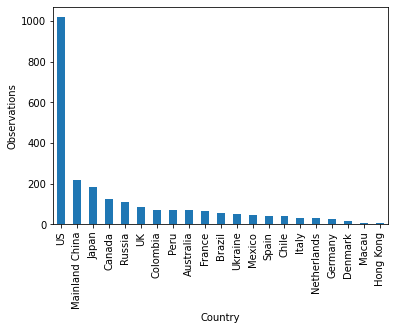

In [ ]:
# plot a bar chart showing the number rows for each country.
df.Country.value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Observations') 

## Use at least two of the following depending on your question of interest: pairplot, histogram, barplot, boxplot, or scatterplot.

In [ ]:
world=df.groupby('Country',sort=False).sum()
world = world.sort_index(ascending = True)
print (world)

                Confirmed  Deaths  Recovered
Country                                     
Australia           63874     841      58696
Brazil           16650887  472246    6813247
Canada             694926   56704     545762
Chile             1823707   56454     265641
Colombia           111097    9182     152266
Denmark             16356      55       1442
France            1355589   18338      18963
Germany           1592669   32040    1817240
Hong Kong            9064      28       7445
Italy             3631608  109042    1242450
Japan              434245    5077     795101
Macau                 367       0        383
Mainland China     573644   33044     549827
Mexico            1275195  136672     789945
Netherlands         24218     616       1334
Peru              7617004  152388    8044283
Russia            3619466   17904    1508703
Spain             2454924  965040   33787964
UK                 307585   19679      14667
US               13030958  765050    3601383
Ukraine   

In [ ]:
world1 = world.sort_values("Confirmed", ascending = False)
print (world1)

                Confirmed  Deaths  Recovered
Country                                     
Brazil           16650887  472246    6813247
US               13030958  765050    3601383
Peru              7617004  152388    8044283
Italy             3631608  109042    1242450
Russia            3619466   17904    1508703
Spain             2454924  965040   33787964
Chile             1823707   56454     265641
Germany           1592669   32040    1817240
France            1355589   18338      18963
Mexico            1275195  136672     789945
Canada             694926   56704     545762
Ukraine            577423    8349     189446
Mainland China     573644   33044     549827
Japan              434245    5077     795101
UK                 307585   19679      14667
Colombia           111097    9182     152266
Australia           63874     841      58696
Netherlands         24218     616       1334
Denmark             16356      55       1442
Hong Kong            9064      28       7445
Macau     

The United states has the second most amount of COVID cases in the world only behind Brazil.  However, the US did have have more deaths, and therefore less recoveries, than Brazil.  

In [ ]:
# Filter US COVID cases only.
df.query('Country == "US"', inplace = True)
df

,State,Country,Confirmed,Deaths,Recovered
ObservationDate,,,,,
2020-06-04 00:00:00,Washington,US,22773,1151,0
2020-06-05 00:00:00,Washington,US,23099,1165,0
2020-06-06 00:00:00,Washington,US,23485,1181,0
2020-06-07 00:00:00,Washington,US,23809,1187,0
2020-06-08 00:00:00,Washington,US,24032,1195,0
...,...,...,...,...,...
2020-06-06 00:00:00,Recovered,US,0,0,503670
2020-06-07 00:00:00,Recovered,US,0,0,512724
2020-06-08 00:00:00,Recovered,US,0,0,523070


In [ ]:
# US COVID Cases by Date.
df.groupby('ObservationDate').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-04 00:00:00,1,0,0
2020-03-05 00:00:00,1,0,0
2020-03-06 00:00:00,102,0,21
2020-03-07 00:00:00,41,0,37
2020-03-08 00:00:00,19,0,20
2020-03-09 00:00:00,228,0,2
2020-03-10 00:00:00,1589,12,12
2020-03-11 00:00:00,1358,24,27
2020-03-12 00:00:00,1766,38,28


In [ ]:
# Group variables and sum each cases by Dates.
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['ObservationDate'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['ObservationDate'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['ObservationDate'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered',
    xaxis_tickfont_size=10,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=14,
        tickfont_size=10,
    ),
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.01, # gap between bars of adjacent location coordinates.
    bargroupgap=0.01 # gap between bars of the same location coordinate.
)
fig.show()

## Simulate a nonparametric inference of the Median for a quantitative variable in the dataset.

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
import random

#### Filtering data with Pandas .query() method

In [ ]:
df.query('Country == "US"', inplace = True)
df

,State,Country,Confirmed,Deaths,Recovered
ObservationDate,,,,,
2020-06-04 00:00:00,Washington,US,22773,1151,0
2020-06-05 00:00:00,Washington,US,23099,1165,0
2020-06-06 00:00:00,Washington,US,23485,1181,0
2020-06-07 00:00:00,Washington,US,23809,1187,0
2020-06-08 00:00:00,Washington,US,24032,1195,0
...,...,...,...,...,...
2020-06-06 00:00:00,Recovered,US,0,0,503670
2020-06-07 00:00:00,Recovered,US,0,0,512724
2020-06-08 00:00:00,Recovered,US,0,0,523070


In [ ]:
df.shape

(1019, 5)

In [ ]:
df.columns

Index(['State', 'Country', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 2020-06-04 00:00:00 to 2020-06-10 00:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      1019 non-null   object
 1   Country    1019 non-null   object
 2   Confirmed  1019 non-null   int64 
 3   Deaths     1019 non-null   int64 
 4   Recovered  1019 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 241.1 KB


In [ ]:
# load the data and draw a sample (s) of 1000 rows to use as our representative sample of the “US”.
df=df.sample(1000,random_state=7)
original_sample=df['Confirmed']
original_sample.head

<bound method NDFrame.head of ObservationDate
2020-03-15 00:00:00      22
2020-06-05 00:00:00    1029
2020-03-12 00:00:00       1
2020-03-14 00:00:00     136
2020-03-16 00:00:00       1
                       ... 
2020-03-16 00:00:00       1
2020-06-08 00:00:00    5662
2020-03-13 00:00:00     437
2020-03-15 00:00:00       1
2020-03-31 00:00:00       0
Name: Confirmed, Length: 1000, dtype: int64>

In [89]:
# Scenario:
# Let’s say that we are given this sample of 1000 rows and we want somehow to estimate the 95% confidence interval of the mean. 
# We can start by computing the summary statistics and plot the histogram of the ratings.

original_sample.describe()

count      1000.000000
mean      12961.422000
std       40089.767437
min           0.000000
25%           1.000000
50%          16.500000
75%        8576.500000
max      392490.000000
Name: Confirmed, dtype: float64

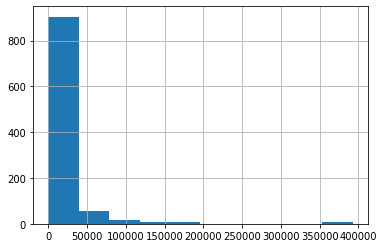

In [90]:
# Run the histogram of the bootstrapped sample.
original_sample.hist()

#### The above histogram of the ratings is not a recognizable form like a normal distribution. Its mean is 12,961 but the question is what can we say about the true mean value. We cannot build a confidence interval by simulating the sampling distribution because we don’t know how to describe it. 
#### Using Bootstrap will estimate the uncertainty of the mean by generating samples from our data and then characterize the distribution of the mean over these samples.
#### We will sample our data “with replacement“ below. That means we draw random ratings allowing the same rating to be drawn again.

#### We created a dataframe having the mean ratings of 1000 samples for Confirmed cases. Plotting the histogram of the bootstrapped samples.

In [92]:
# bootstrapping
median_boot_samples=[]
for i in range (1000):
  boot_sample=np.random.choice(original_sample, size=100)
  median_boot_samples.append(np.median(boot_sample))
np.mean(median_boot_samples)

25.5145

In [93]:
# The middle 95% interval conf_int.
conf_int=np.percentile(median_boot_samples,(2.5,97.5))
print(conf_int)

[ 2.    93.025]


#### We created a dataframe having the mean ratings of 1000 samples. Plotting the histogram of the bootstrapped samples, 
#### we can clearly see that it approximates a normal distribution in line with the central limit theorem (CLT).

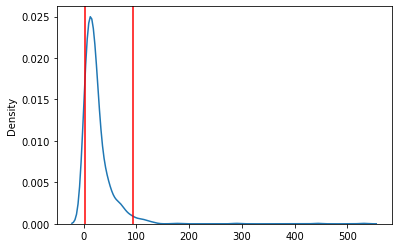

In [94]:
sns.kdeplot(median_boot_samples)
for endpoint in conf_int:
  plt.axvline(endpoint, color='red')

## Conclusions

* The US had the second most amount of deaths and confirmed cases.  The US also had the most amount rows and observations in the dataset.  It is possible that the disparity in observations per country could have affected the data.  
* The US's number of confirmed cases drastically increased in June of 2020.
* I believe the dataset is incorrect at times which is why the June observations are significantly larger than the other observations from other months.  This is why the mean for the simulation of the median daily confirmed cases amount is less than the mean for the simulation of the mean daily confirmed cases.